Number of documents: 16
Total sentences: 596
Average sentences per document: 37.25
Total words: 6034
Average words per sentence: 10.124161073825503
Unique words: 1450


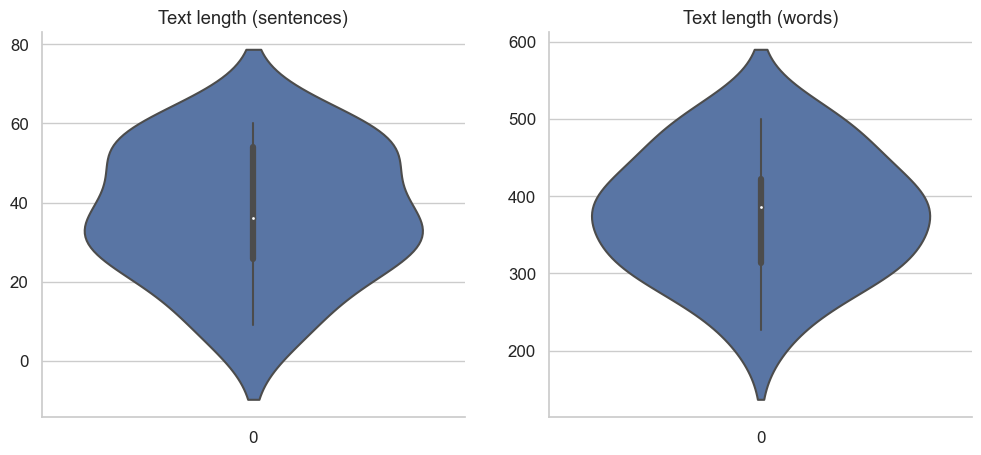

In [1]:
import matplotlib as mpl
import seaborn as sns
import glob
import BreathWork_Utils as bwutils

%matplotlib inline
sns.set_style('white')
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams["image.composite_image"] = False

textFiles = glob.glob(filepath, recursive=True)

texts = []
for file in textFiles:
    with open(file, "r") as fic:
        content = fic.read().replace('\n', '')
    texts.append(content)


df = bwutils.preprocess(texts)
df['stemmed_words'] = df['words'].apply(bwutils.lemmatize_words)
bwutils.basic_statistics(df)
bwutils.visualize_length_distribution(df)

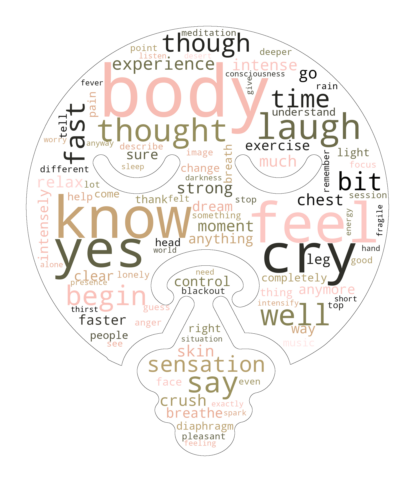

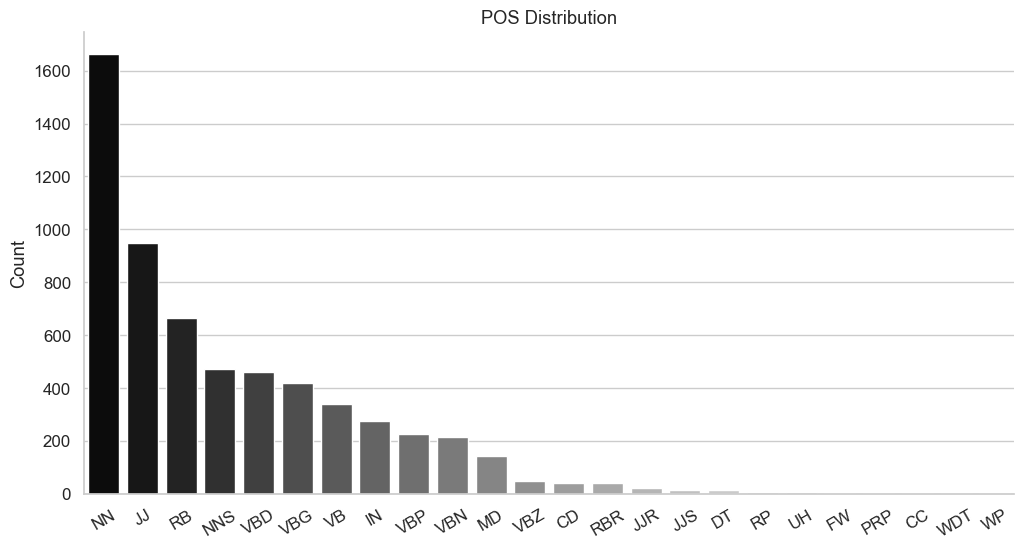

In [2]:
bwutils.generate_word_cloud(df)
bwutils.visualize_pos_distribution(df)

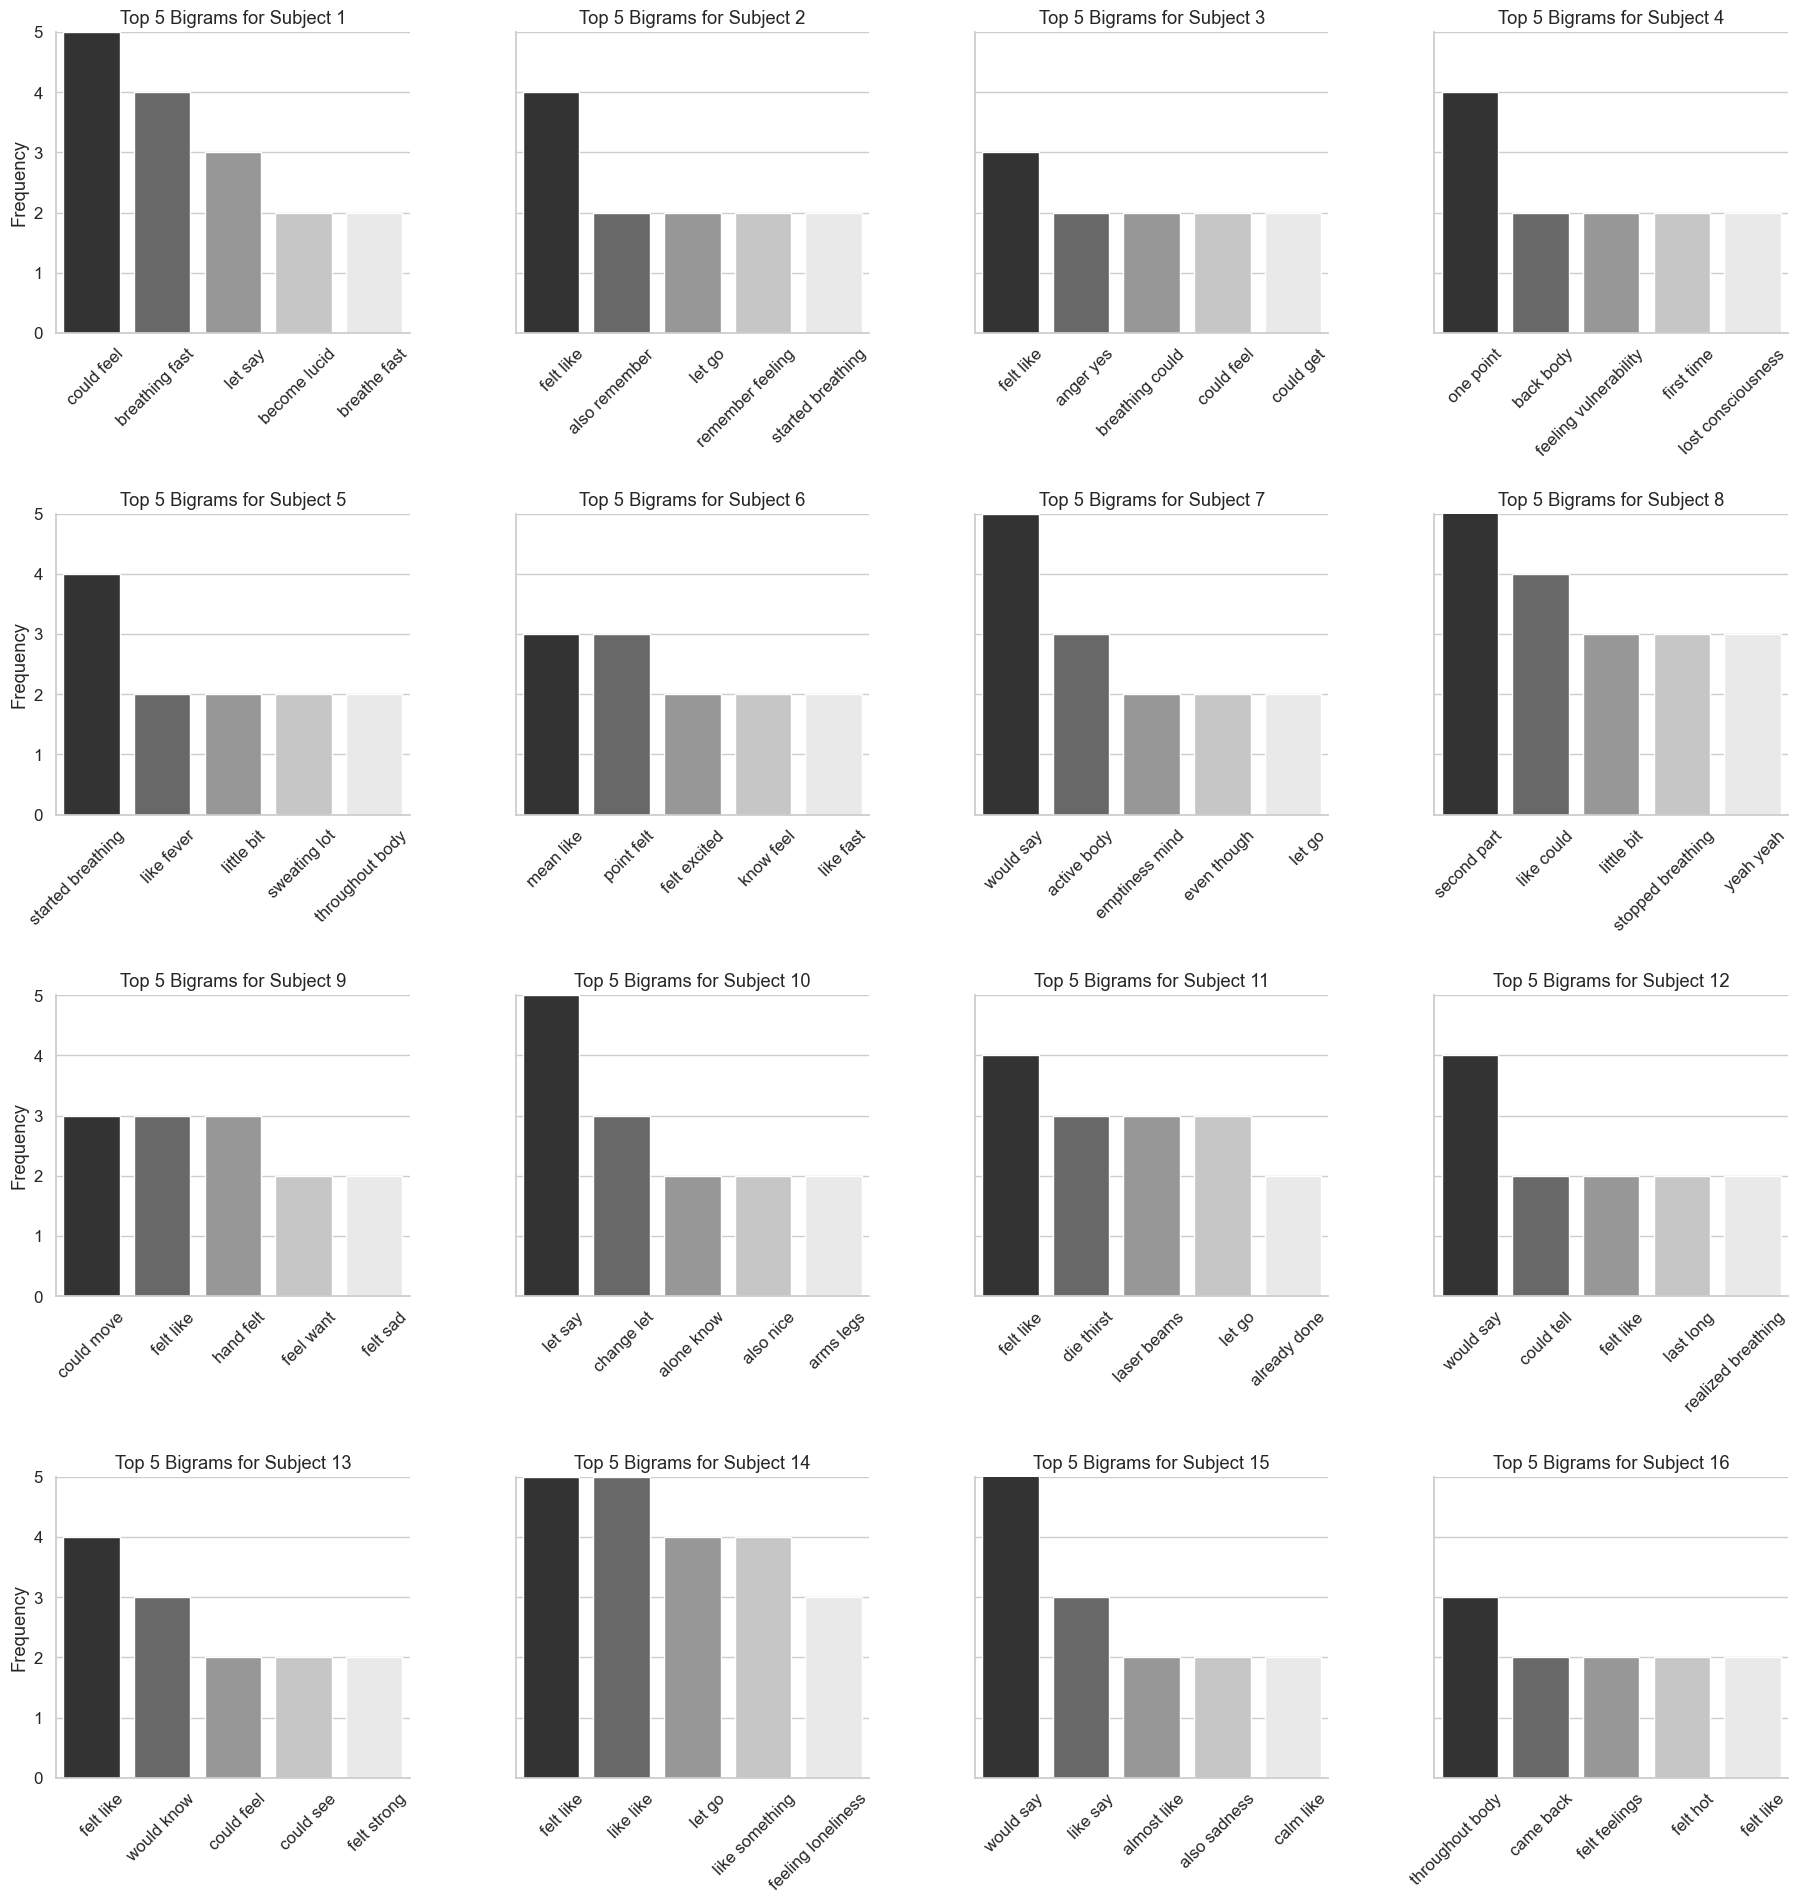

In [3]:
bwutils.plot_top_bigrams(df)

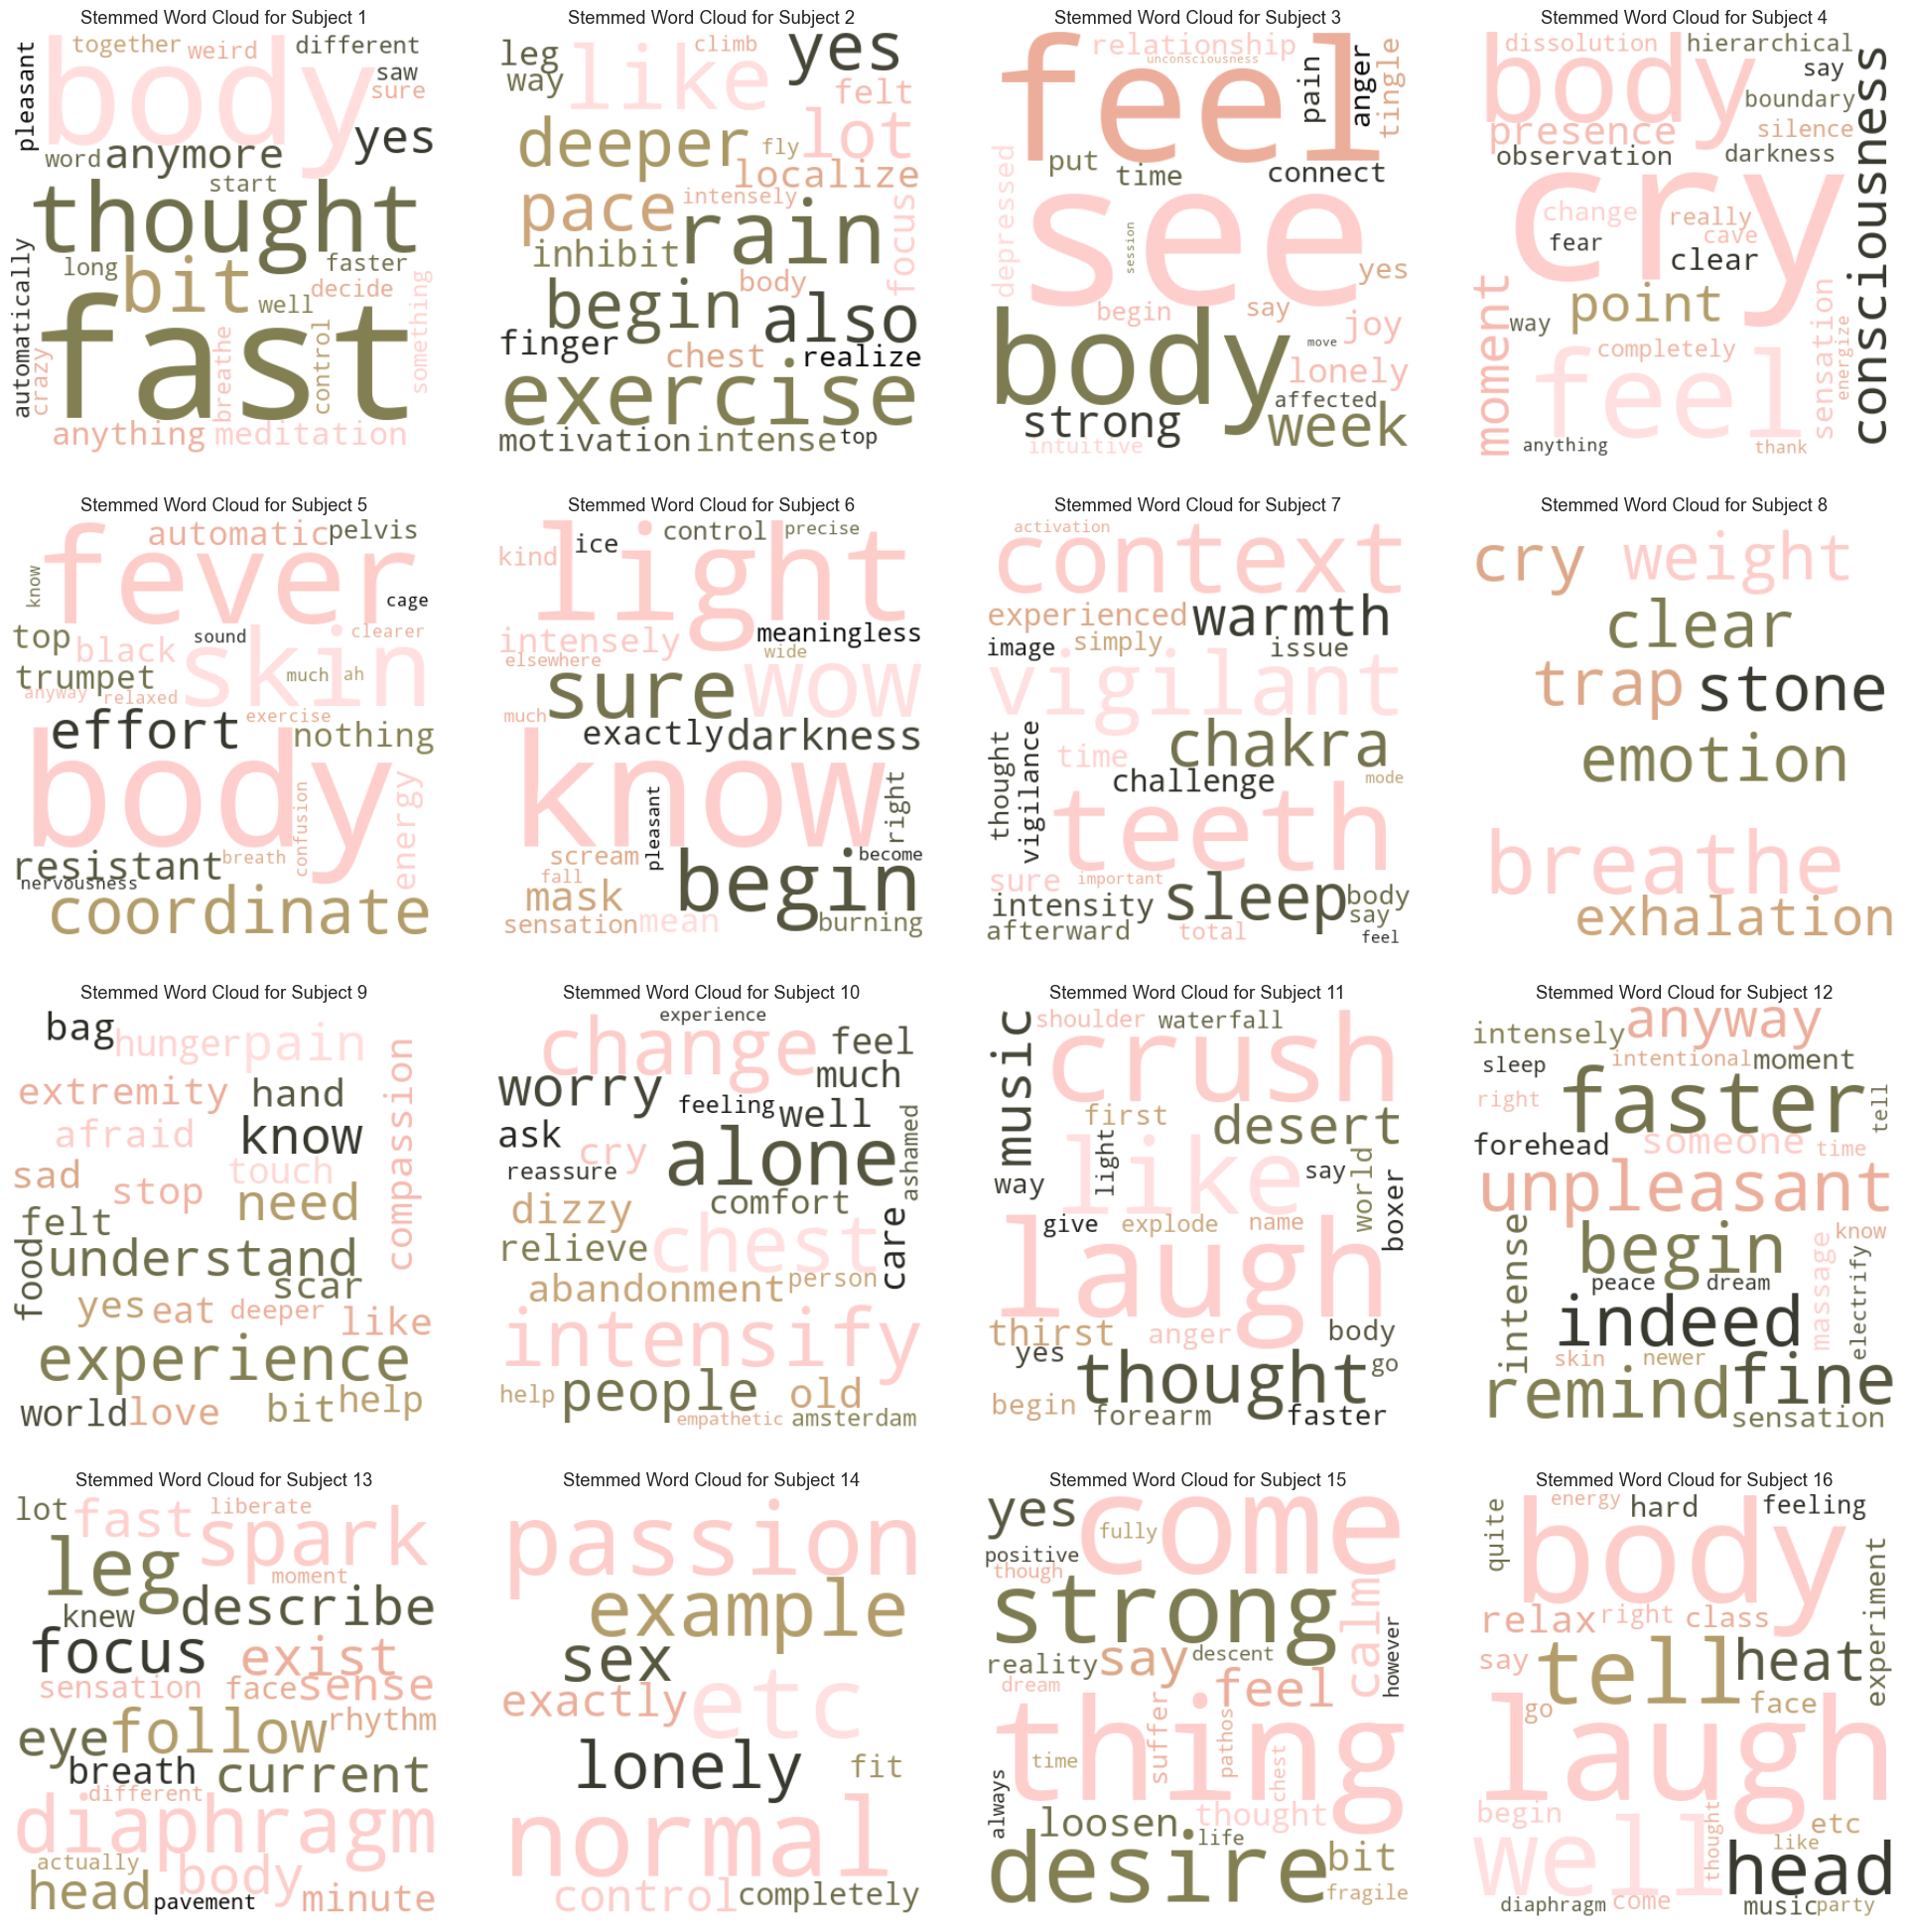

In [4]:
bwutils.plot_stemmed_word_clouds(df)

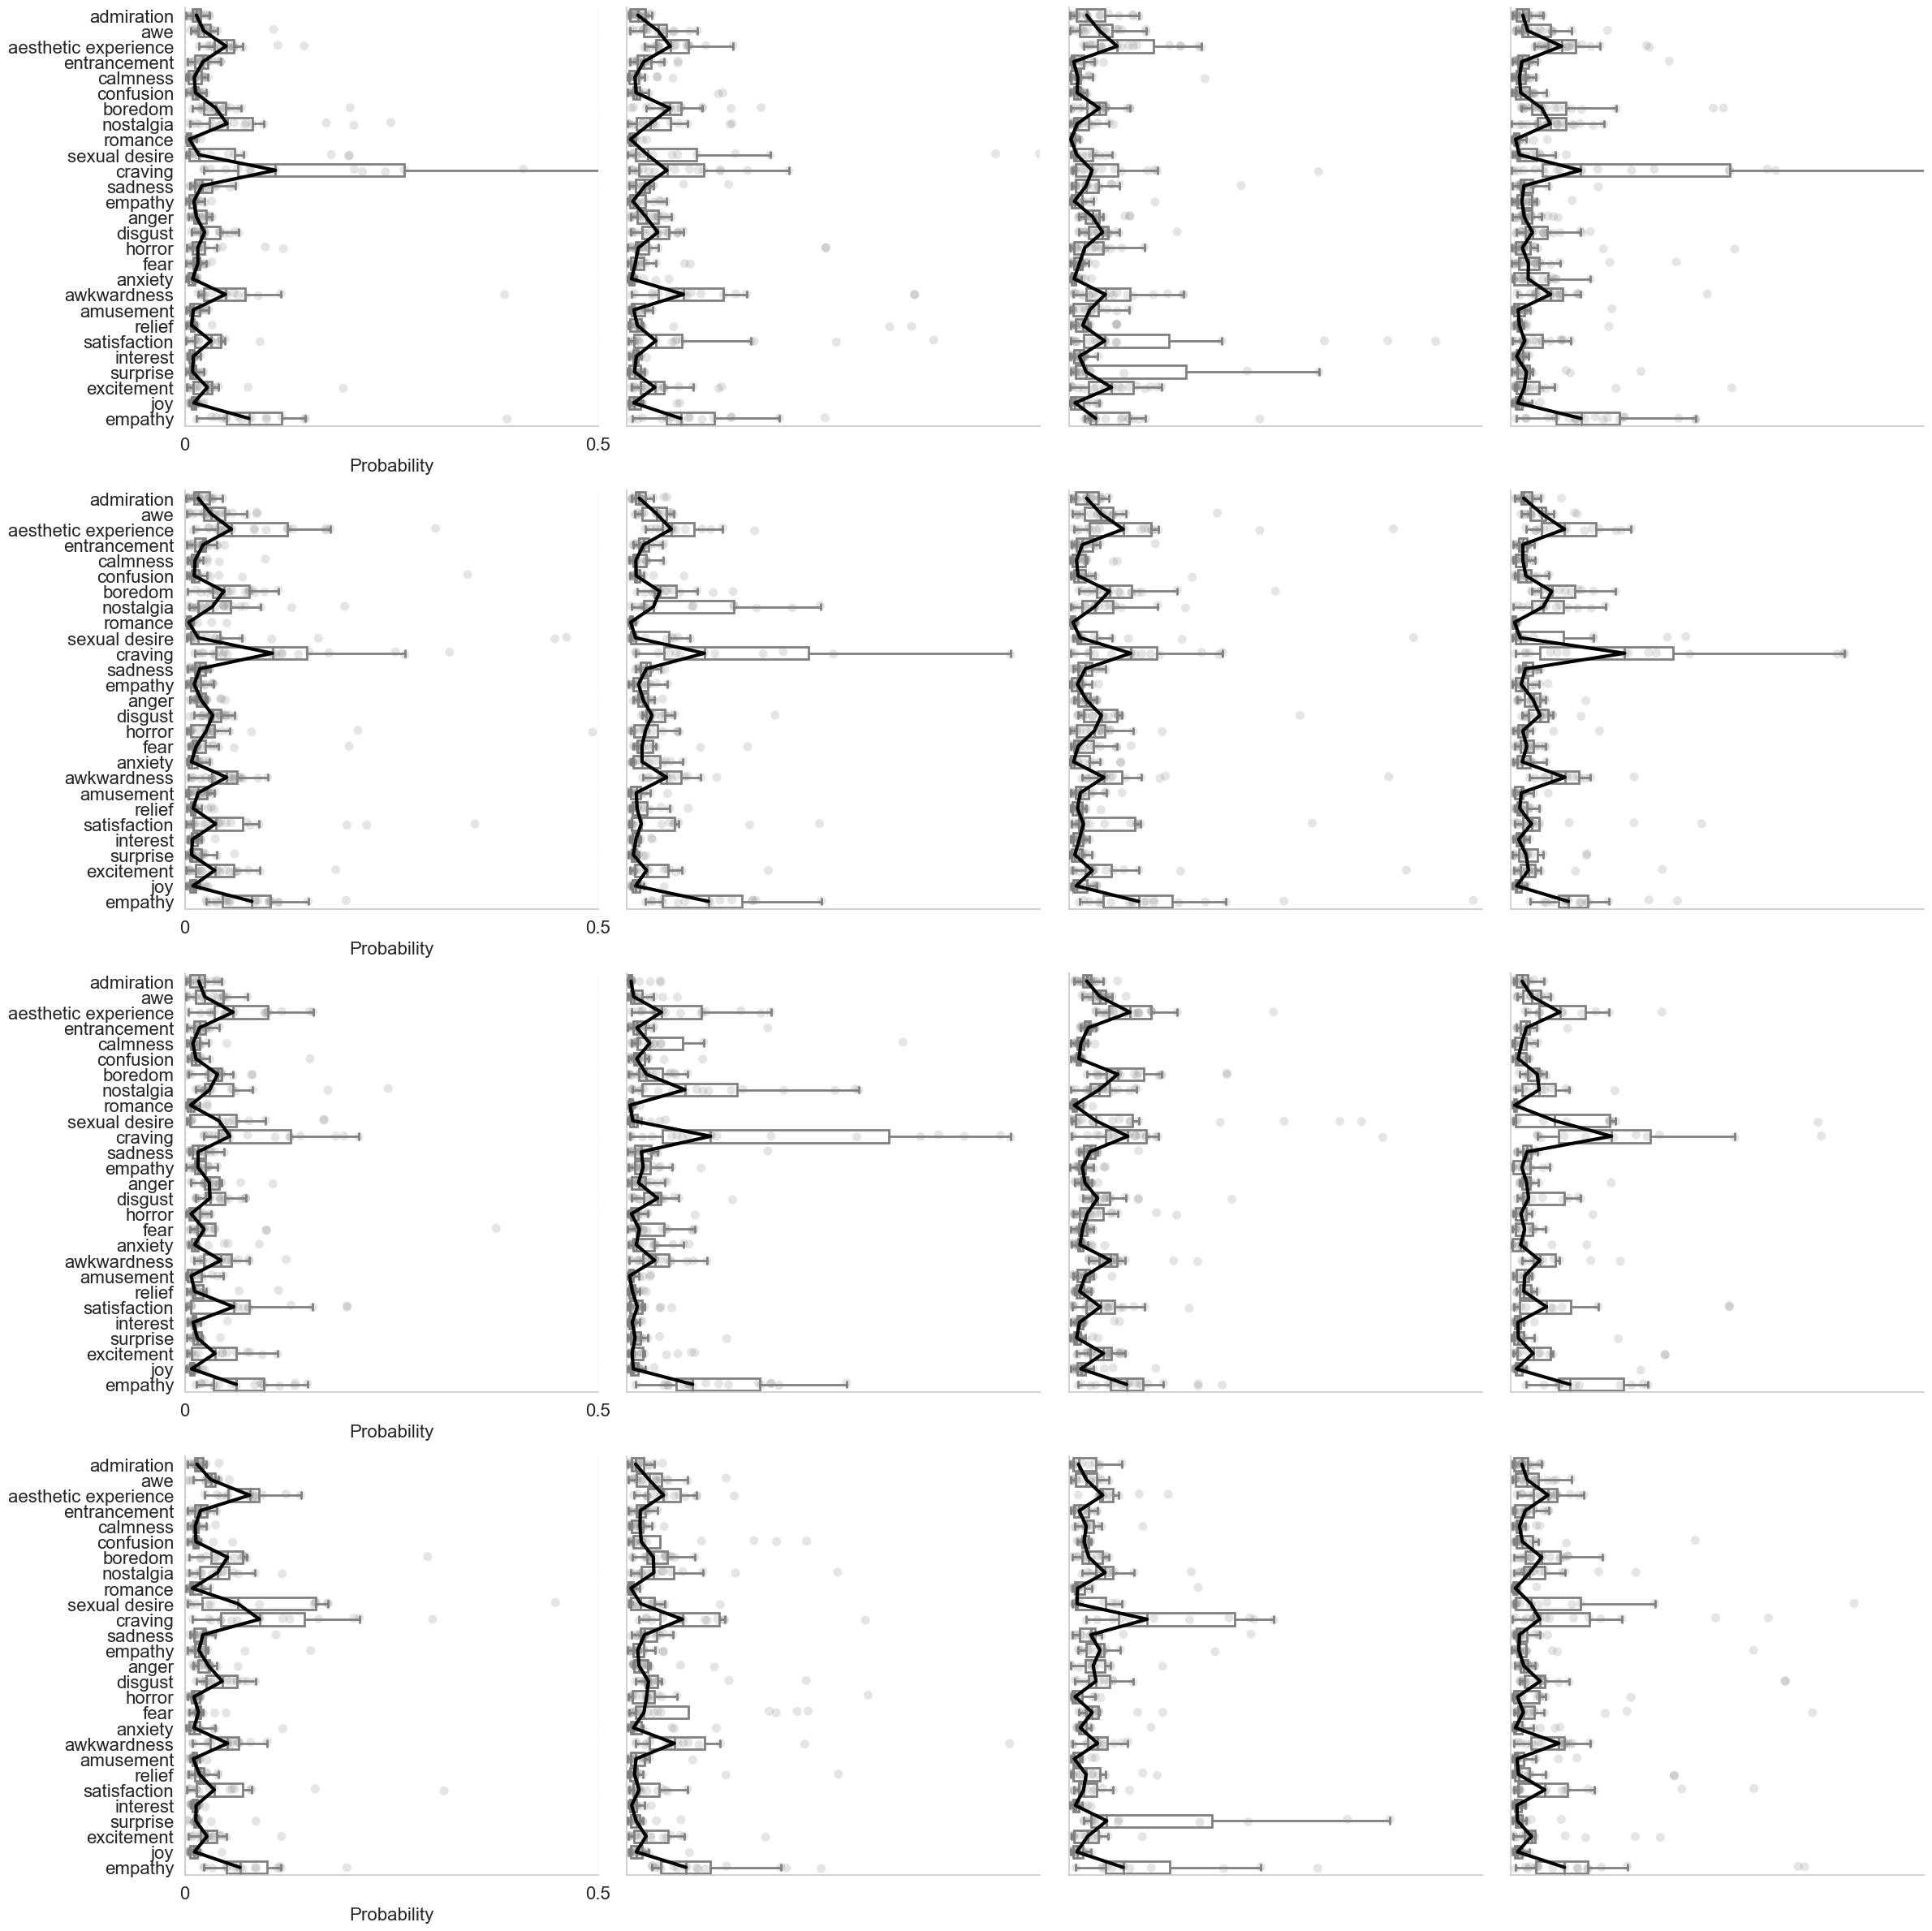

In [57]:
import numpy as np
import matplotlib.pyplot as plt

scores = np.load('Scores_PerParticipant_English_30032023.npz', allow_pickle=True)
candidate_labels = ['adoration', 'admiration', 'aesthetic experience','amusement', 'anger', 'anxiety', 'awe', 'awkwardness', 'boredom', 'calmness', 'confusion',
                    'craving', 'disgust', 'empathy', 'entrancement', 'excitement', 'fear', 'horror', 'interest', 'joy', 'nostalgia', 'relief',
                    'romance', 'sadness', 'satisfaction', 'sexual desire', 'surprise']
candidate_labels2 = ['admiration', 'awe', 'aesthetic experience', 'entrancement', 'calmness', 'confusion', 'boredom', 'nostalgia',
                    'romance', 'sexual desire', 'craving', 'sadness', 'empathy', 'anger', 'disgust', 'horror', 'fear', 'anxiety', 
                    'awkwardness', 'amusement', 'relief', 'satisfaction', 'interest', 'surprise', 'excitement', 'joy', 'empathy']
newOrder = []
for ii, elem in enumerate(candidate_labels2):
    if elem != 'pain':
        newOrder.append([i for i, e in enumerate(candidate_labels) if e == elem][0])
    else:
        newOrder.append([i for i, e in enumerate(candidate_labels) if e == 'empathy'][0])

newOrder = np.array(newOrder)
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (24,24))
counter = 0
for ii in scores.keys():
    axi = ax.flat[counter]
    # axi.barh(y = candidate_labels[::-1], width = np.nanmedian(scores[ii], axis = 0)[::-1], color = 'black', alpha = 0.4)
    sns.stripplot(data = scores[ii][newOrder], orient = 'horizontal', color = 'gray', size = 8, alpha = 0.2, jitter = 0.1, ax = axi, zorder = 0)
    sns.boxplot(data = scores[ii][newOrder], orient = 'horizontal', color = 'gray', ax = axi, showfliers = False,
                boxprops=dict(color='gray', facecolor="gray", alpha=1, linewidth = 2),
                medianprops=dict(color='black', linewidth=2), whiskerprops=dict(color='black'),
                capprops=dict(color="black"), zorder=3)
    for i,artist in enumerate(axi.patches):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor('gray')
        artist.set_facecolor('None')
        # Each box has 5 associated Line2D objects (because there are no outliers)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axi.lines[j]
            line.set_color('gray')
            line.set_mfc('gray')
            line.set_mec('gray')
            line.set_lw(2)
    axi.set_xlim([0, 0.5])
    axi.set_xticks([0, 0.5])
    if counter in [0, 4, 8, 12]:
        axi.set_yticklabels(np.array(candidate_labels)[newOrder], fontsize = 16, rotation = 0)
        axi.set_xticklabels(['0', '0.5'], fontsize = 16)
        axi.set_xlabel('Probability', fontsize = 16)
    else:
        axi.set_xticks([])
        axi.set_yticks([])
    counter += 1
    axi.plot(np.nanmedian(scores[ii][newOrder], axis = 0), candidate_labels, ms = 8, alpha = 1, color = 'black', lw = 3, zorder = 4)

sns.despine()
plt.tight_layout()
# plt.savefig('EmotionProbabilities_perParticipant_perSentence_EnglishTranscripts_30032023.pdf', transparent = True)